In [1]:
#Importing the Data Set

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_val_score



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Importing the Data 
train =  pd.read_csv("D:\\Kaggle Projects\\Blue Owl\\train.csv")
test =  pd.read_csv("D:\\Kaggle Projects\\Blue Owl\\test.csv")

In [3]:
test_raw = test.copy() 

In [4]:
test_raw.head(5)

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure
0,34,0.005134,Android,F,1,40376,1,3,7
1,53,0.005223,desktop,F,1,84511,1,1,11
2,46,0.004939,laptop,F,0,79322,1,1,4
3,36,0.004924,Android,F,0,63295,1,2,0
4,28,0.005146,other,F,1,36170,1,3,3


In [5]:
train.head(5)

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
0,56,0.005737,iPhone,M,0,62717,2,1,4,0
1,50,0.004733,desktop,F,0,64328,2,3,2,0
2,54,0.004129,laptop,M,0,83439,1,3,7,0
3,16,0.005117,Android,F,0,30110,2,3,0,0
4,37,0.003635,desktop,M,0,76565,2,1,5,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
age                           10000 non-null int64
cost_of_ad                    10000 non-null float64
device_type                   10000 non-null object
gender                        9731 non-null object
in_initial_launch_location    10000 non-null int64
income                        10000 non-null int64
n_drivers                     10000 non-null int64
n_vehicles                    10000 non-null int64
prior_ins_tenure              10000 non-null int64
outcome                       10000 non-null int64
dtypes: float64(1), int64(7), object(2)
memory usage: 781.3+ KB


In [7]:
x_age = train['age']

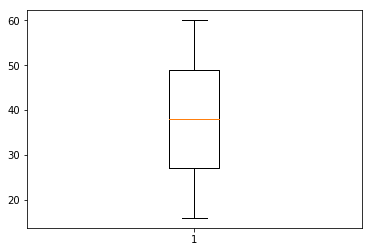

In [8]:
plt.boxplot(x_age)
plt.show()

In [9]:
def transform_diff_grp(dl):
    if dl > 55 : return 1
    elif 45 < dl <= 55 : return 2
    elif 25 < dl <= 45 : return 3
    elif 15 < dl <= 25 : return 4
    elif 0 < dl <= 15 : return 5
    

In [10]:
train["age"] = train['age'].map(transform_diff_grp)
test["age"] = test['age'].map(transform_diff_grp)

In [11]:
age = train['age']

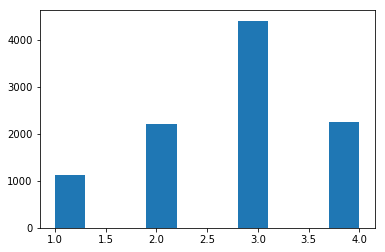

In [12]:
plt.hist(age)
plt.show()

In [13]:
ad_cost = train['cost_of_ad']

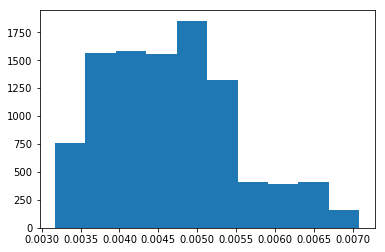

In [14]:
plt.hist(ad_cost)
plt.show()

In [15]:
train.head(5)

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
0,1,0.005737,iPhone,M,0,62717,2,1,4,0
1,2,0.004733,desktop,F,0,64328,2,3,2,0
2,2,0.004129,laptop,M,0,83439,1,3,7,0
3,4,0.005117,Android,F,0,30110,2,3,0,0
4,3,0.003635,desktop,M,0,76565,2,1,5,0


In [16]:
train['device_type'].unique()

array(['iPhone', 'desktop', 'laptop', 'Android', 'other'], dtype=object)

In [17]:
train.loc[(train.device_type== 'iPhone') ,'device_type' ] = 0
train.loc[(train.device_type== 'desktop') ,'device_type' ] = 1
train.loc[(train.device_type== 'laptop') ,'device_type' ] = 2
train.loc[(train.device_type== 'Android') ,'device_type' ] = 3
train.loc[(train.device_type== 'other') ,'device_type' ] = 4

test.loc[(test.device_type== 'iPhone') ,'device_type' ] = 0
test.loc[(test.device_type== 'desktop') ,'device_type' ] = 1
test.loc[(test.device_type== 'laptop') ,'device_type' ] = 2
test.loc[(test.device_type== 'Android') ,'device_type' ] = 3
test.loc[(test.device_type== 'other') ,'device_type' ] = 4

In [18]:
test['gender'].unique()

array(['F', 'M', nan], dtype=object)

In [19]:
test['gender'].fillna(1, inplace=True)
train['gender'].fillna(1, inplace=True)

In [20]:
train.loc[(train.gender== 'M') ,'gender' ] = 1
train.loc[(train.gender== 'F') ,'gender' ] = 0


In [21]:
test.loc[(test.gender== 'M') ,'gender' ] = 1
test.loc[(test.gender== 'F') ,'gender' ] = 0

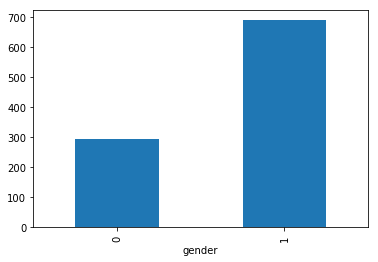

In [22]:
train.groupby(['gender'])['outcome'].sum().plot(kind="bar")
plt.show()

In [23]:
inc = train['income']

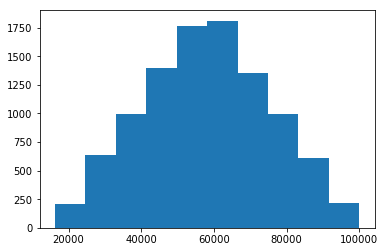

In [24]:
plt.hist(inc)
plt.show()

In [25]:
train['prior_ins_tenure'].unique()

array([ 4,  2,  7,  0,  5,  1, 10,  8,  3,  6, 11, 18,  9, 17, 16, 19, 13,
       12, 15, 14, 22, 21, 20], dtype=int64)

In [26]:
ins_ten = train['prior_ins_tenure']

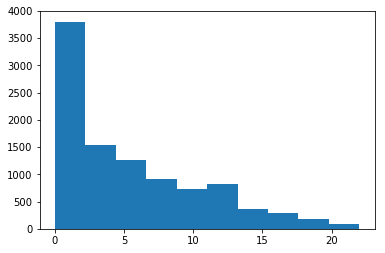

In [27]:
plt.hist(ins_ten)
plt.show()

In [28]:
ins_new = preprocessing.scale(np.sqrt(train['prior_ins_tenure'])) 
test_ins_new = preprocessing.scale(np.sqrt(test['prior_ins_tenure'])) 

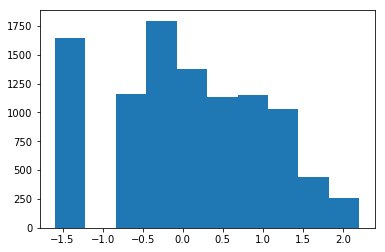

In [29]:
plt.hist(ins_new)
plt.show()

In [30]:
train['prior_ins_tenure'] = ins_new
test['prior_ins_tenure'] = test_ins_new

In [31]:
ins_vec = train['n_drivers']

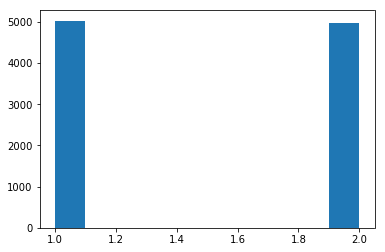

In [32]:
plt.hist(ins_vec)
plt.show()

In [33]:
train['device_type'] = train['device_type'].apply(int)
train['gender'] = train['gender'].apply(int)
test['device_type'] = test['device_type'].apply(int)
test['gender'] = test['gender'].apply(int)

In [34]:
train['n_drivers'].unique()

array([2, 1], dtype=int64)

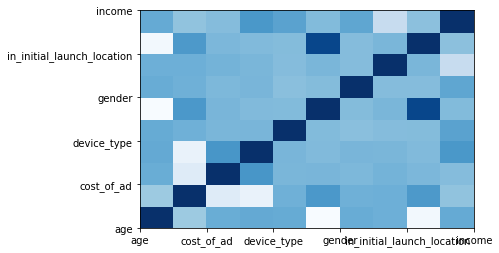

In [35]:
# Checking the Corrrelation Matrix 
Corr_Analysis_Train = train.corr()
Corr_Analysis_Train.to_csv("D:\\Kaggle Projects\\Blue Owl\\Corr_Analysis_Train.csv", index=True , header=True)
fig, ax = plt.subplots()
ax.pcolor(Corr_Analysis_Train.corr(), cmap=plt.cm.Blues)
ax.set_xticklabels(Corr_Analysis_Train.columns)
ax.set_yticklabels(Corr_Analysis_Train.columns)
plt.show()

In [36]:
y_train = train['outcome']
train_new = train.drop('outcome', 1)


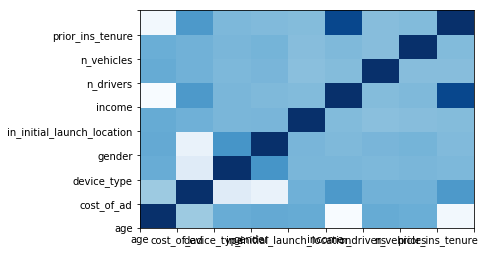

In [37]:
# Checking the Corrrelation Matrix 
Corr_Analysis_Train = train_new.corr()
#Corr_Analysis_Train.to_csv("D:\\Kaggle Projects\\Blue Owl\\Corr_Analysis_Train.csv", index=True , header=True)
fig, ax = plt.subplots()
ax.pcolor(Corr_Analysis_Train.corr(), cmap=plt.cm.Blues)
ax.set_xticklabels(Corr_Analysis_Train.columns)
ax.set_yticklabels(Corr_Analysis_Train.columns)
plt.show()

In [38]:
train_new[train_new.dtypes[(train_new.dtypes=="float64")|(train_new.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA1D0226A0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001BA1D092198>]], dtype=object)

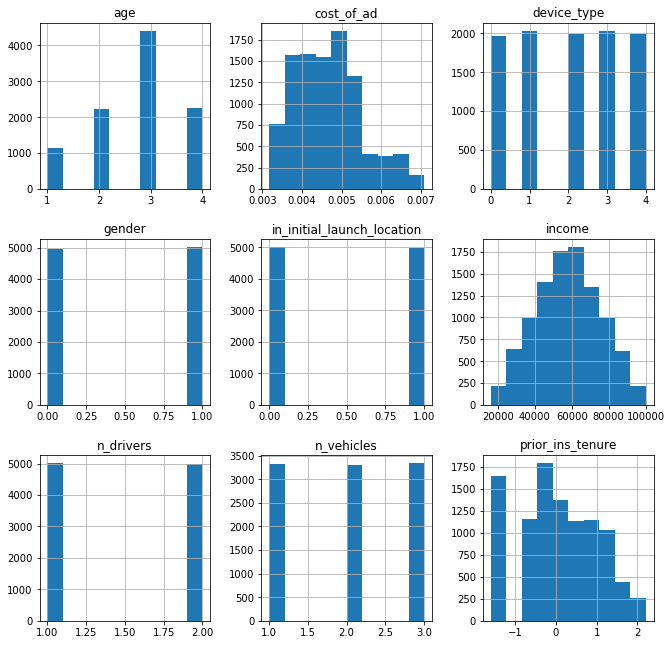

In [39]:
plt.show()

In [40]:
model = XGBClassifier()
model.fit(train_new, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [41]:
roc = cross_val_score(model, train_new, y_train, scoring='roc_auc' ,cv=5) 

In [42]:
np.mean(roc)

0.84355108689757863

In [43]:
y_pred = model.predict(test)

In [44]:
test_raw.head(5)

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure
0,34,0.005134,Android,F,1,40376,1,3,7
1,53,0.005223,desktop,F,1,84511,1,1,11
2,46,0.004939,laptop,F,0,79322,1,1,4
3,36,0.004924,Android,F,0,63295,1,2,0
4,28,0.005146,other,F,1,36170,1,3,3


In [45]:
test_raw['outcome'] = y_pred

In [46]:
test_raw.head(15)

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
0,34,0.005134,Android,F,1,40376,1,3,7,0
1,53,0.005223,desktop,F,1,84511,1,1,11,0
2,46,0.004939,laptop,F,0,79322,1,1,4,0
3,36,0.004924,Android,F,0,63295,1,2,0,0
4,28,0.005146,other,F,1,36170,1,3,3,0
5,51,0.006242,iPhone,F,0,60520,1,1,14,0
6,20,0.003534,desktop,M,0,59324,1,1,0,0
7,35,0.004568,Android,F,0,37002,2,3,5,0
8,32,0.004713,Android,F,1,45207,1,2,7,0
9,33,0.006178,iPhone,F,0,72587,1,2,6,0


In [47]:
test_raw.to_csv("D:\\Kaggle Projects\\Blue Owl\\FinalResult.csv", index=True , header=True) 